복습

In [240]:
# 라이브러리 불러오기
import pandas as pd
# import matplotlib.pyplot as plt

# 데이터 불러오기
path = 'https://bit.ly/TipsFile'
tip = pd.read_csv(path)

# 확인
print(tip.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [241]:
# 열 이름, 데이터 개수, 데이터 형식
print(tip.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


선택할 수 있는 값이 : 범주형

In [246]:
# 범주값 개수 확인
print(tip['day'].value_counts())

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


In [243]:
# 특정 열 최대값
print(tip[ ['total_bill', 'tip'] ].max())

total_bill    50.81
tip           10.00
dtype: float64


-----------------------------------------------------------------------

# 1) 데이터 조회

# ★ 데이터프레임.loc[ 행정보 , 열정보 ] ★

## 열조회

In [15]:
# 열 하나 조회
# tip.loc[ 행정보 , 열정보 ]
print(tip.loc[ : , 'tip' ])

print('='*50)

print(tip['total_bill' ])

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64
0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64


In [21]:
# 열 여럿 조회
print(tip.loc[ : , ['tip', 'total_bill'] ]) # 리스트로 덩어리를 줘서 2개의 컬럼을 조회

print('='*50)

print(tip[ ['tip', 'total_bill'] ]) # 컬럼조회할 때만 loc 뺄 수 있음, 나머지는 다 loc 붙인다!

      tip  total_bill
0    1.01       16.99
1    1.66       10.34
2    3.50       21.01
3    3.31       23.68
4    3.61       24.59
..    ...         ...
239  5.92       29.03
240  2.00       27.18
241  2.00       22.67
242  1.75       17.82
243  3.00       18.78

[244 rows x 2 columns]
      tip  total_bill
0    1.01       16.99
1    1.66       10.34
2    3.50       21.01
3    3.31       23.68
4    3.61       24.59
..    ...         ...
239  5.92       29.03
240  2.00       27.18
241  2.00       22.67
242  1.75       17.82
243  3.00       18.78

[244 rows x 2 columns]


In [22]:
# 열 범위 조회
# 범위를 줄 때는 무조건 .loc[] 를 써야한다★

print(tip.loc[ : , 'tip':'day' ])

      tip     sex smoker   day
0    1.01  Female     No   Sun
1    1.66    Male     No   Sun
2    3.50    Male     No   Sun
3    3.31    Male     No   Sun
4    3.61  Female     No   Sun
..    ...     ...    ...   ...
239  5.92    Male     No   Sat
240  2.00  Female    Yes   Sat
241  2.00    Male    Yes   Sat
242  1.75    Male     No   Sat
243  3.00  Female     No  Thur

[244 rows x 4 columns]


In [24]:
# tip, day, time 열 만 조회
print(tip.loc[ : , ['tip', 'day', 'time'] ])
print(tip[ ['tip', 'day', 'time'] ])

      tip   day    time
0    1.01   Sun  Dinner
1    1.66   Sun  Dinner
2    3.50   Sun  Dinner
3    3.31   Sun  Dinner
4    3.61   Sun  Dinner
..    ...   ...     ...
239  5.92   Sat  Dinner
240  2.00   Sat  Dinner
241  2.00   Sat  Dinner
242  1.75   Sat  Dinner
243  3.00  Thur  Dinner

[244 rows x 3 columns]
      tip   day    time
0    1.01   Sun  Dinner
1    1.66   Sun  Dinner
2    3.50   Sun  Dinner
3    3.31   Sun  Dinner
4    3.61   Sun  Dinner
..    ...   ...     ...
239  5.92   Sat  Dinner
240  2.00   Sat  Dinner
241  2.00   Sat  Dinner
242  1.75   Sat  Dinner
243  3.00  Thur  Dinner

[244 rows x 3 columns]


In [25]:
tip2 = tip[['day', 'time', 'tip']]
print(tip2.head())

   day    time   tip
0  Sun  Dinner  1.01
1  Sun  Dinner  1.66
2  Sun  Dinner  3.50
3  Sun  Dinner  3.31
4  Sun  Dinner  3.61


## 행 조회(대부분 조건 조회)

In [28]:
print(tip.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [32]:
# index가 3인 행을 보고 싶다
print(tip.loc[ 3, : ])
print(tip.loc[3]) # 열을 조회 할 때 앞부분은 생략할 수 없지만 뒤에는 생략가능

total_bill     23.68
tip             3.31
sex             Male
smoker            No
day              Sun
time          Dinner
size               2
Name: 3, dtype: object
total_bill     23.68
tip             3.31
sex             Male
smoker            No
day              Sun
time          Dinner
size               2
Name: 3, dtype: object


In [47]:
# tip 컬럼이 5 달러 인 것
print(tip.loc[ tip['tip'] == 5, : ])

     total_bill  tip     sex smoker   day    time  size
11        35.26  5.0  Female     No   Sun  Dinner     4
39        31.27  5.0    Male     No   Sat  Dinner     3
46        22.23  5.0    Male     No   Sun  Dinner     2
73        25.28  5.0  Female    Yes   Sat  Dinner     2
83        32.68  5.0    Male    Yes  Thur   Lunch     2
142       41.19  5.0    Male     No  Thur   Lunch     5
143       27.05  5.0  Female     No  Thur   Lunch     6
156       48.17  5.0    Male     No   Sun  Dinner     6
185       20.69  5.0    Male     No   Sun  Dinner     5
197       43.11  5.0  Female    Yes  Thur   Lunch     4


&(and), |(or)

In [48]:
# tip 컬럼이 8 달러 이상인 것
print(tip.loc[ tip['tip'] >= 8, : ])

     total_bill   tip   sex smoker  day    time  size
170       50.81  10.0  Male    Yes  Sat  Dinner     3
212       48.33   9.0  Male     No  Sat  Dinner     4


In [49]:
# tip 컬럼이 5 달러 이상이고 size 컬럼이 4 미만 인 것
print(tip.loc[ (tip['tip'] >= 5) & (tip['size'] < 4)  , : ])

     total_bill    tip     sex smoker   day    time  size
39        31.27   5.00    Male     No   Sat  Dinner     3
46        22.23   5.00    Male     No   Sun  Dinner     2
73        25.28   5.00  Female    Yes   Sat  Dinner     2
83        32.68   5.00    Male    Yes  Thur   Lunch     2
88        24.71   5.85    Male     No  Thur   Lunch     2
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3


In [52]:
# tip 컬럼이 5 달러 이상이고 size 컬럼이 4 미만 인 것 ← 심플하게!!!

cond1 = tip['tip'] >= 5
cond2 = tip['size'] < 4

print(tip.loc[ cond1 & cond2 , : ])

     total_bill    tip     sex smoker   day    time  size
39        31.27   5.00    Male     No   Sat  Dinner     3
46        22.23   5.00    Male     No   Sun  Dinner     2
73        25.28   5.00  Female    Yes   Sat  Dinner     2
83        32.68   5.00    Male    Yes  Thur   Lunch     2
88        24.71   5.85    Male     No  Thur   Lunch     2
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3


In [63]:
# tip 데이터프레임에서 남자 고객의 tip, day, time만 추출해서 tip2 데이터프레임 선언

tip2 = tip.loc[tip['sex'] == 'Male', ['tip', 'day', 'time']]
print(tip2.head())

    tip  day    time
1  1.66  Sun  Dinner
2  3.50  Sun  Dinner
3  3.31  Sun  Dinner
5  4.71  Sun  Dinner
6  2.00  Sun  Dinner


-----------------------------------------------------------------------

연습

In [86]:
c1 = (tip['size'] == 1)
c2 = (tip['day'].isin(['Thur', 'Fri']))
tmp = tip.loc[c1 & c2 , 'total_bill'].sum()
print(tmp)

18.65


-----------------------------------------------------------------------

In [101]:
print(tip.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [110]:
# 토요일, 일요일 의 data 만 조회
tmp = tip.loc[tip['day'].isin(['Sat', 'Sun']), :]
# total_bill 기준으로 내림차순으로 정렬
tmp = tmp.sort_values(by='total_bill', ascending=False)  # 방법1

# 확인
print(tmp)

     total_bill    tip     sex smoker  day    time  size
170       50.81  10.00    Male    Yes  Sat  Dinner     3
212       48.33   9.00    Male     No  Sat  Dinner     4
59        48.27   6.73    Male     No  Sat  Dinner     4
156       48.17   5.00    Male     No  Sun  Dinner     6
182       45.35   3.50    Male    Yes  Sun  Dinner     3
..          ...    ...     ...    ...  ...     ...   ...
6          8.77   2.00    Male     No  Sun  Dinner     2
218        7.74   1.44    Male    Yes  Sat  Dinner     2
172        7.25   5.15    Male    Yes  Sun  Dinner     2
111        7.25   1.00  Female     No  Sat  Dinner     1
67         3.07   1.00  Female    Yes  Sat  Dinner     1

[163 rows x 7 columns]


→ reset_index() 로 인덱스를 깔끔하게 정렬해주자

### ▼  .copy() 를 해야 → 복사를 해서 데이터프레임을 따로 따로 핸들링 할 수 있다

In [114]:
# 토요일, 일요일 의 data 만 조회
top10 = tip.loc[tip['day'].isin(['Sat', 'Sun']), :].copy()

# total_bill 기준으로 내림차순으로 정렬
top10.sort_values(by='total_bill', ascending=False, inplace=True) # 방법2
top10 = top10.head(10)
top10.reset_index(drop=True, inplace=True)

# 확인
print(top10)

   total_bill    tip     sex smoker  day    time  size
0       50.81  10.00    Male    Yes  Sat  Dinner     3
1       48.33   9.00    Male     No  Sat  Dinner     4
2       48.27   6.73    Male     No  Sat  Dinner     4
3       48.17   5.00    Male     No  Sun  Dinner     6
4       45.35   3.50    Male    Yes  Sun  Dinner     3
5       44.30   2.50  Female    Yes  Sat  Dinner     3
6       40.55   3.00    Male    Yes  Sun  Dinner     2
7       39.42   7.58    Male     No  Sat  Dinner     4
8       38.73   3.00    Male    Yes  Sat  Dinner     4
9       38.07   4.00    Male     No  Sun  Dinner     3


-----------------------------------------------------------------------

# 2) 데이터프레임 집계
109~

In [116]:
print(tip.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [120]:
tmp = tip['total_bill'].sum()
print(tmp)

4827.77


## 데이터프레임.groupby(by='컬럼명', as_index=True)  
* as_index=True를 설정(기본값)하면 집계 기준이 되는 열이 인덱스 열이 된다  

In [125]:
tmp = tip.groupby(by='day', as_index=True)['total_bill'].sum()
print(tmp)

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64


* as_index=False를 설정하면 열로 들어간다.

In [126]:
tmp = tip.groupby(by='day', as_index=False)['total_bill'].sum()
print(tmp)

    day  total_bill
0   Fri      325.88
1   Sat     1778.40
2   Sun     1627.16
3  Thur     1096.33


## 집계 결과 시각화

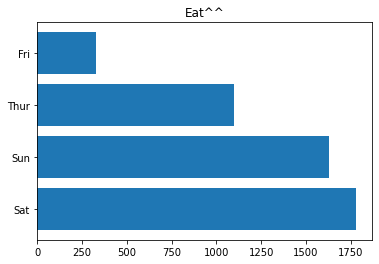

<Figure size 432x288 with 0 Axes>

In [139]:
tmp = tip.groupby(by='day', as_index=False)['total_bill'].sum()
tmp.sort_values(by='total_bill', ascending=False, inplace=True)

# 시각화 
import matplotlib.pyplot as plt

# 가로 막대
plt.barh(tmp['day'], tmp['total_bill'])
plt.title('Eat^^')
plt.show()

plt.savefig('test.png')

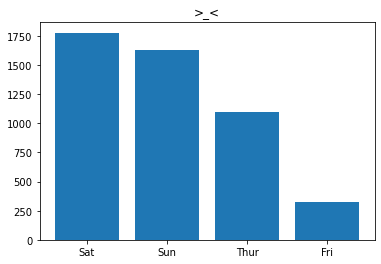

<Figure size 432x288 with 0 Axes>

In [143]:
tmp = tip.groupby(by='day', as_index=False)['total_bill'].sum()
tmp.sort_values(by='total_bill', ascending=False, inplace=True)

# 시각화 
import matplotlib.pyplot as plt

# 세로막대
plt.bar(tmp['day'], tmp['total_bill'])
plt.title('>_<')
plt.show()

plt.savefig('test.png')

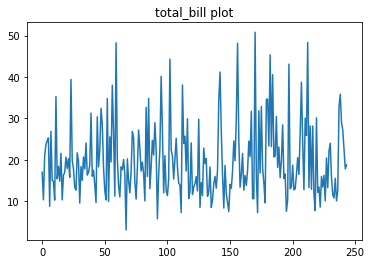

<Figure size 432x288 with 0 Axes>

In [154]:
# 시각화 
import matplotlib.pyplot as plt

# 선 그래프
plt.plot(tip['total_bill'])
plt.title('total_bill plot')
plt.show()

plt.savefig('test.png')

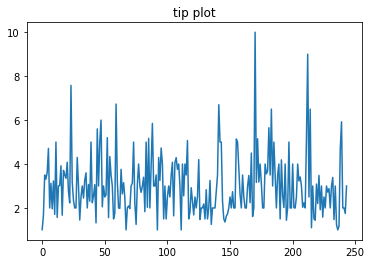

<Figure size 432x288 with 0 Axes>

In [156]:
# 시각화 
import matplotlib.pyplot as plt

# 선 그래프
plt.plot(tip['tip'])
plt.title('tip plot')
plt.show()

plt.savefig('test.png')

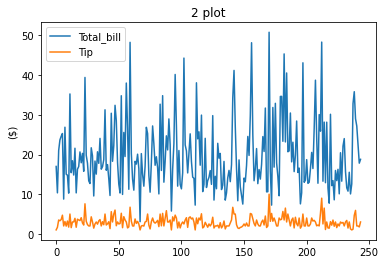

<Figure size 432x288 with 0 Axes>

In [162]:
# 시각화 
import matplotlib.pyplot as plt

# 선 그래프 2개를 한 그래프에 그리기
plt.plot(tip['total_bill'])
plt.plot(tip['tip'])

# 범례 표시 
plt.legend(['Total_bill', 'Tip'])

# 차트 제목
plt.title('2 plot')

# y축 단위 표시
plt.ylabel('($)')

plt.show()

plt.savefig('test.png')

-----------------------------------------------------------------------

4.1.2.여러 열 집계

In [165]:
# day 별 total_bill, tip 합계

tmp = tip.groupby(by='day', as_index=False)[['total_bill', 'tip']].sum()
print(tmp)

    day  total_bill     tip
0   Fri      325.88   51.96
1   Sat     1778.40  260.40
2   Sun     1627.16  247.39
3  Thur     1096.33  171.83


In [166]:
# day 별 total_bill, tip 평균

tmp = tip.groupby(by='day', as_index=False)[['total_bill', 'tip']].mean()
print(tmp)

    day  total_bill       tip
0   Fri   17.151579  2.734737
1   Sat   20.441379  2.993103
2   Sun   21.410000  3.255132
3  Thur   17.682742  2.771452


In [170]:
# tip 데이터프레임의 
# 모든 열에 대한 day별 평균 구하기

tmp = tip.groupby(by='day', as_index=False).mean()
print(tmp)

    day  total_bill       tip      size
0   Fri   17.151579  2.734737  2.105263
1   Sat   20.441379  2.993103  2.517241
2   Sun   21.410000  3.255132  2.842105
3  Thur   17.682742  2.771452  2.451613


In [175]:
# 모든 열에 대한 day 별 sex 별 평균 구하기

tmp = tip.groupby(by=['day', 'sex'], as_index=False).mean()
print(tmp)

    day     sex  total_bill       tip      size
0   Fri  Female   14.145556  2.781111  2.111111
1   Fri    Male   19.857000  2.693000  2.100000
2   Sat  Female   19.680357  2.801786  2.250000
3   Sat    Male   20.802542  3.083898  2.644068
4   Sun  Female   19.872222  3.367222  2.944444
5   Sun    Male   21.887241  3.220345  2.810345
6  Thur  Female   16.715312  2.575625  2.468750
7  Thur    Male   18.714667  2.980333  2.433333


In [177]:
# 모든 열에 대한 day 별 time 별 평균 구하기

tmp = tip.groupby(by=['day', 'time'], as_index=False).mean()
print(tmp)

    day    time  total_bill       tip      size
0   Fri  Dinner   19.663333  2.940000  2.166667
1   Fri   Lunch   12.845714  2.382857  2.000000
2   Sat  Dinner   20.441379  2.993103  2.517241
3   Sun  Dinner   21.410000  3.255132  2.842105
4  Thur  Dinner   18.780000  3.000000  2.000000
5  Thur   Lunch   17.664754  2.767705  2.459016
